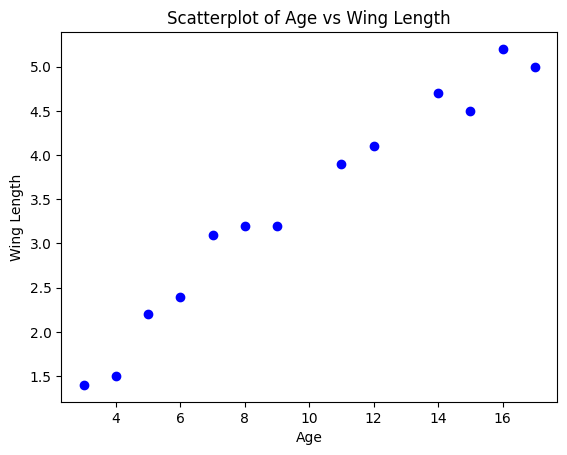

In [3]:
# 1. Plot the relationship between Age and Wing Length.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

plt.scatter(age, wing, color="blue")
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Scatterplot of Age vs Wing Length")
plt.show()





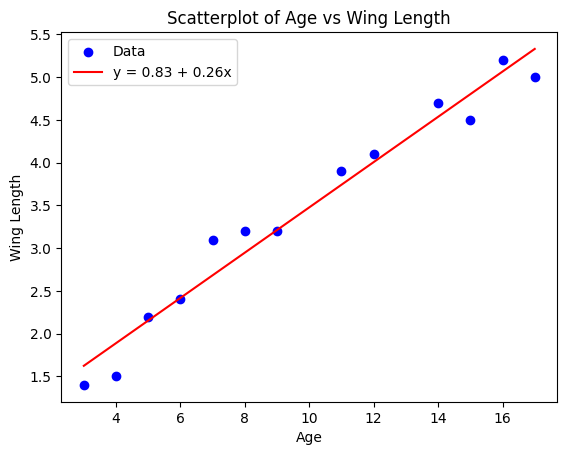

In [ ]:
# 2. Calculate and plot the regression line
# Reshape for sklearn (linear regression expects 2D array for features)
X = age.reshape(-1, 1)
y = wing

model = LinearRegression()
model.fit(X, y) #trains the model using your data. X is the input feature (age), and y is the target variable (wing length).

slope = model.coef_[0] #array of regression coefficients
intercept = model.intercept_

# Plot with regression line
plt.scatter(age, wing, color="blue", label="Data")
plt.plot(age, model.predict(X), color="red", label=f"y = {intercept:.2f} + {slope:.2f}x")
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Scatterplot of Age vs Wing Length")
plt.legend()
plt.show()


In [7]:
# 3. Can you reject H0: b = 0?

slope, intercept, r_value, p_value, std_err = stats.linregress(age, wing) #linear regression of wing (Y) on age (X).
#slope = regression coefficient b1 (how much Y changes for each +1 in X).
#intercept = regression coefficient b0 (value of Y when X=0).
#r_value = correlation coefficient (strength and direction of linear relationship).
#p_value = significance of the slope (probability of observing the data if H0 is true).
#std_err = standard error of the slope (variability of the slope estimate).

print("Slope =", slope)
print("Intercept =", intercept)
print("p-value for slope =", p_value)

if p_value < 0.05:
    print("Reject H0: slope is significantly different from 0")
else:
    print("Fail to reject H0: slope not significant")


Slope = 0.2646841206602163
Intercept = 0.8296243597040407
p-value for slope = 3.0097431724571258e-09
Reject H0: slope is significantly different from 0


95% CI for slope: [0.230, 0.299]


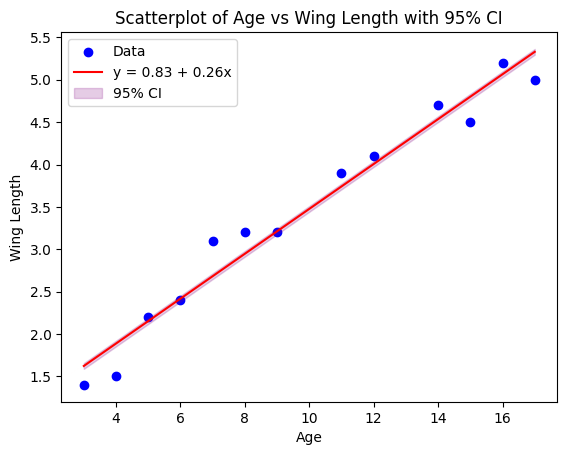

In [10]:
#4. Calculate and plot the confidence intervals on the slope of the regression.

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df=len(age)-2)  # two-tailed
ci_lower = slope - t_crit * std_err
ci_upper = slope + t_crit * std_err
print(f"95% CI for slope: [{ci_lower:.3f}, {ci_upper:.3f}]")
# Plot with regression line and confidence intervals
plt.scatter(age, wing, color="blue", label="Data")
plt.plot(age, model.predict(X), color="red", label=f"y = {intercept:.2f} + {slope:.2f}x")
plt.fill_between(age, model.predict(X) + t_crit * std_err,
                 model.predict(X) - t_crit * std_err, color='purple', alpha=0.2, label="95% CI")
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Scatterplot of Age vs Wing Length with 95% CI")
plt.legend()
plt.show()


In [ ]:
#5. Calculate r^2 (the coefficient of determination).

r2 = r_value**2 #r value from 3
print("R-squared =", r2)


R-squared = 0.9633822518042855


In [20]:
#6. Calculate Pearson's r

pearson_r, pearson_p = stats.pearsonr(age, wing)
print("Pearson's r =", pearson_r)
print("p-value =", pearson_p)



Pearson's r = 0.9815203776816283
p-value = 3.0097431724567374e-09


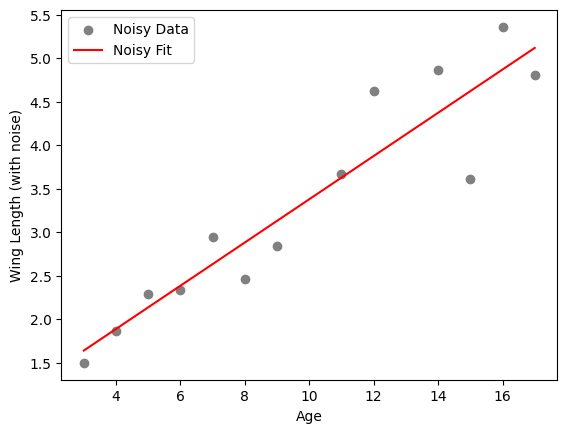

Noisy slope = 0.24856701733055706
Noisy R² = 0.8667400106547392


In [ ]:
#7. Add some noise to the data and see how the regression changes.

noise = np.random.normal(0, 0.5, size=len(wing)) 
#draws random samples from a normal (Gaussian) distribution.
wing_noisy = wing + noise
#takes the original wing data and adds the generated noise to create a new dataset with variability.

# Refit regression
slope_n, intercept_n, r_value_n, _, _ = stats.linregress(age, wing_noisy)

plt.scatter(age, wing_noisy, color="gray", label="Noisy Data")
plt.plot(age, intercept_n + slope_n*age, color="red", label="Noisy Fit")
plt.xlabel("Age")
plt.ylabel("Wing Length (with noise)")
plt.legend()
plt.show()

print("Noisy slope =", slope_n)
print("Noisy R² =", r_value_n**2)
